In [30]:
import pandas as pd
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# Read from CSV

df1 = pd.read_csv('Outputs/packets-udp-rfc761-plaintext-dinamico-2021.09.27-processed')
df2 = pd.read_csv('Outputs/packets-tcp-rfc761-plaintext-dinamico-2021.09.27-processed')

In [32]:
# Filtering by port

is_port = df1['dstport']==20001
#print(is_port.head())
df1 = df1[is_port]
is_port = df2['dstport']==8088
df2 = df2[is_port]

In [33]:
# Filtering by the number of packets of chosen size

is_bytes = df1['payload_size']>2
df1 = df1[is_bytes]
is_bytes = df2['payload_size']>2
df2 = df2[is_bytes]

In [34]:
# Sort dataframe by an index (column) and show

df1 = df1.sort_values('shannon')
df2 = df2.sort_values('shannon')
print(df2.iloc[:,6:11])

     payload_size   shannon      bien     tbien
100          1024  0.213344  0.704251  0.823971
51           1024  0.224973  0.455405  0.682295
102          1024  0.228214  0.764830  0.898085
53           1024  0.228416  0.438007  0.688564
172          1024  0.247868  0.615498  0.800137
..            ...       ...       ...       ...
298          1024  0.298345  0.595860  0.905983
110          1024  0.300075  0.612239  0.955267
115          1024  0.300494  0.567676  0.889993
134          1024  0.301561  0.657957  0.950124
132          1024  0.307852  0.593027  0.940398

[157 rows x 4 columns]


In [35]:
len(df1.index) == len(df2.index)
df1

,id,proto,srcip,dstip,srcport,dstport,payload_size,shannon,bien,tbien
123,d7ubLXwB47XzyDm_Uulr,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.632660,0.461807,0.953775
124,eLubLXwB47XzyDm_Uulr,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.644455,0.944600,0.964611
119,c7ubLXwB47XzyDm_Uulr,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.656250,0.914152,0.912518
64,PLubLXwB47XzyDm_Uulq,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.662349,0.461527,0.931501
126,erubLXwB47XzyDm_Uulr,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.675705,0.459005,0.949543
...,...,...,...,...,...,...,...,...,...,...
57,NbubLXwB47XzyDm_Uulq,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.800705,0.935036,0.966221
91,V7ubLXwB47XzyDm_Uulq,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.800705,0.953136,0.963263
74,RrubLXwB47XzyDm_Uulq,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.800705,0.472357,0.946168
120,dLubLXwB47XzyDm_Uulr,udp,127.0.0.1,127.0.0.1,61132,20001,1032,0.800705,0.451375,0.933010


In [38]:
df = df1.iloc[:,7:10]
df = df.rename(columns={"shannon":"udp_shannon","bien":"udp_bien","tbien":"udp_tbien"})
df['tcp_shannon'] = df2['shannon'].values
df['tcp_bien'] = df2['bien'].values
df['tcp_tbien'] = df2['tbien'].values
df

,udp_shannon,udp_bien,udp_tbien,tcp_shannon,tcp_bien,tcp_tbien
123,0.632660,0.461807,0.953775,0.213344,0.704251,0.823971
124,0.644455,0.944600,0.964611,0.224973,0.455405,0.682295
119,0.656250,0.914152,0.912518,0.228214,0.764830,0.898085
64,0.662349,0.461527,0.931501,0.228416,0.438007,0.688564
126,0.675705,0.459005,0.949543,0.247868,0.615498,0.800137
...,...,...,...,...,...,...
57,0.800705,0.935036,0.966221,0.298345,0.595860,0.905983
91,0.800705,0.953136,0.963263,0.300075,0.612239,0.955267
74,0.800705,0.472357,0.946168,0.300494,0.567676,0.889993
120,0.800705,0.451375,0.933010,0.301561,0.657957,0.950124


In [41]:
df = df.reset_index()

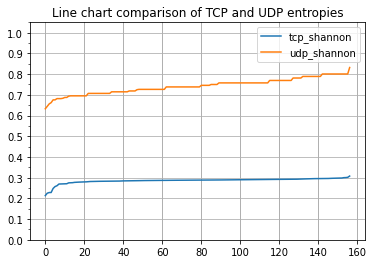

In [42]:
# Plot 1

title = 'Line chart comparison of TCP and UDP entropies'
ax = df.plot(y=['tcp_shannon','udp_shannon'],kind='line',title=title, grid=True)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=1)
ymajortick = arange(0,1.1,0.1)
yminortick = arange(0,1.1,0.05)
ax.set_yticks( ymajortick, minor=False )
ax.set_yticks( yminortick, minor=True )
ax.grid('on', which='both', axis='x' )